# Mushroom classification problem

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno

In [4]:
Df = pd.read_csv('mushrooms.csv')
Df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
Df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [7]:
#lets get some info on them
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [8]:
#lets check if any missing values 
Df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

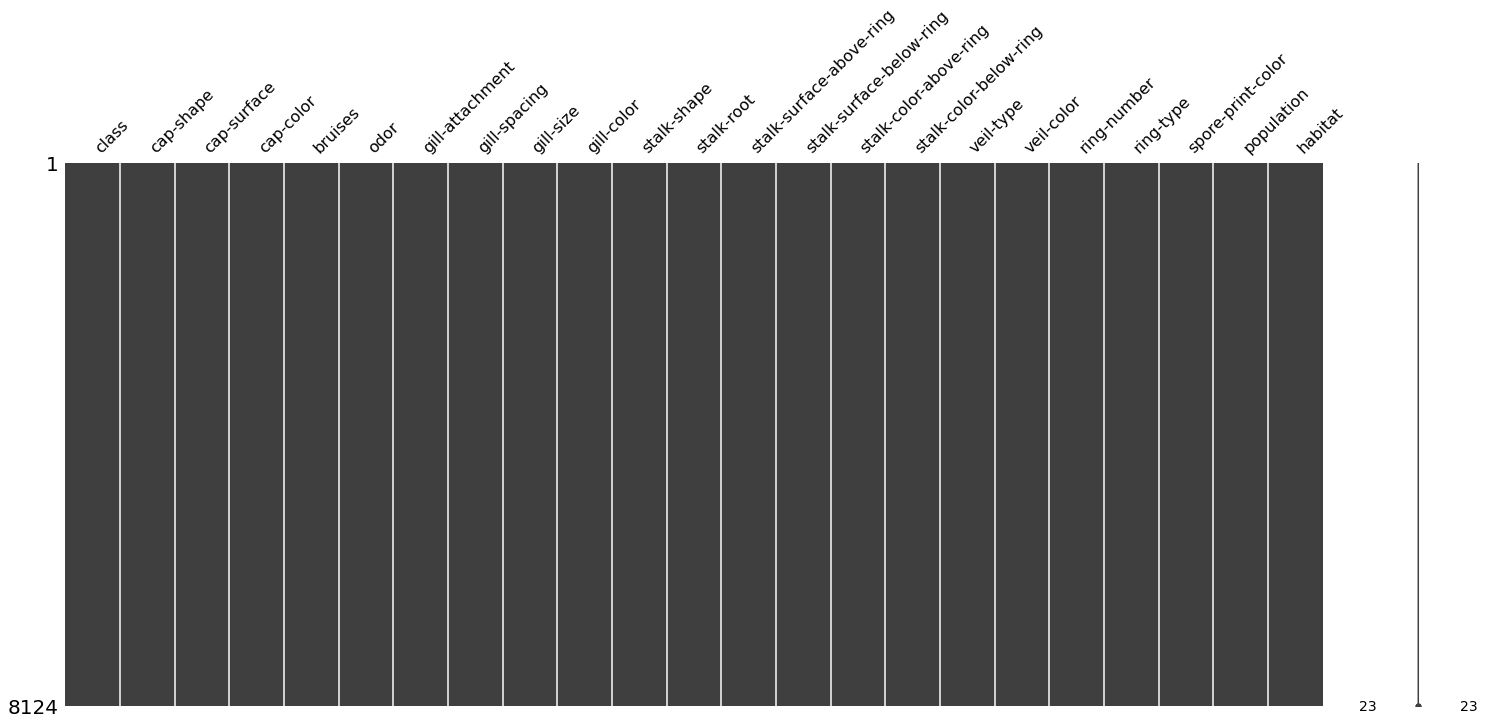

In [10]:
#lets visualize them
missingno.matrix(Df);

In [11]:
Df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

* we can understand that data is balanced which helps our model to predict in high accuracy

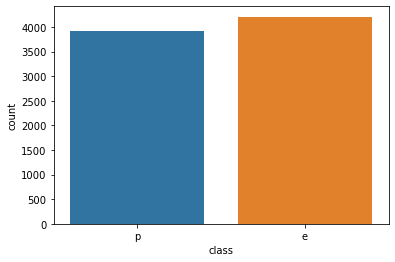

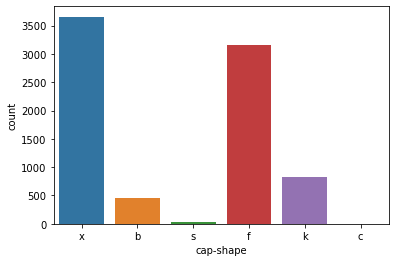

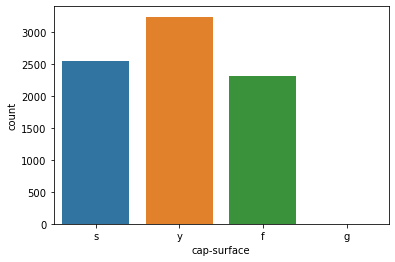

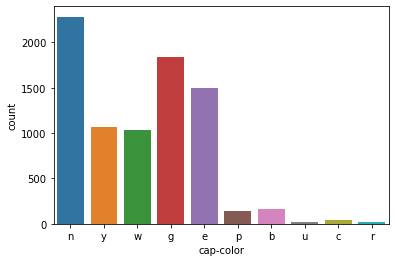

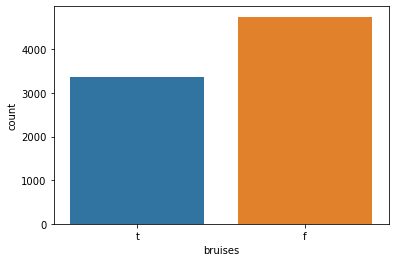

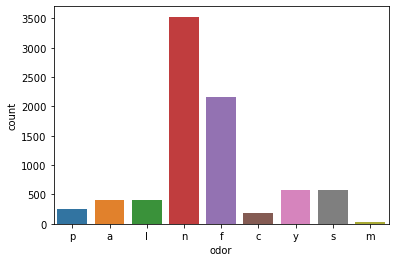

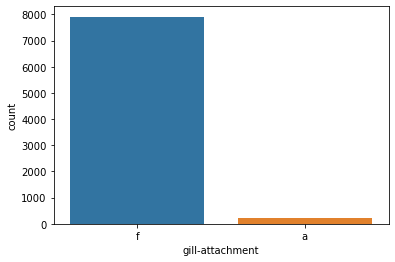

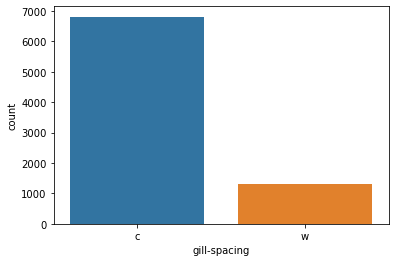

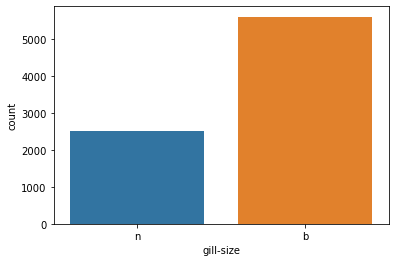

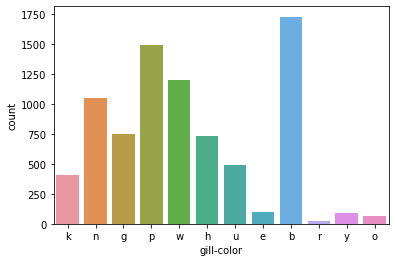

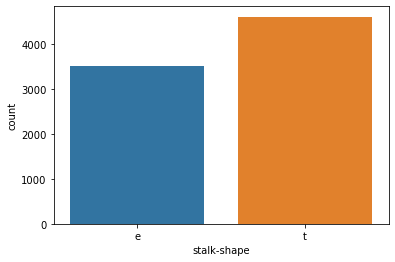

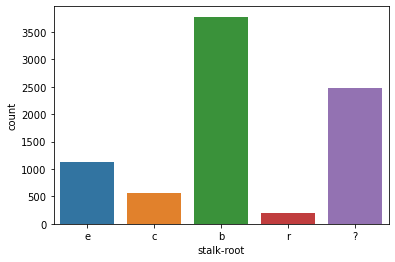

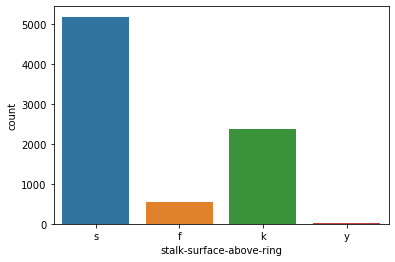

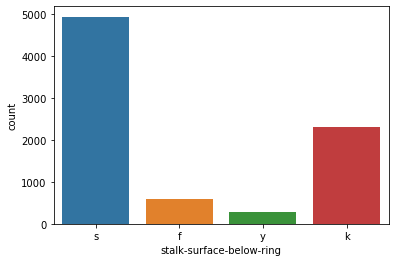

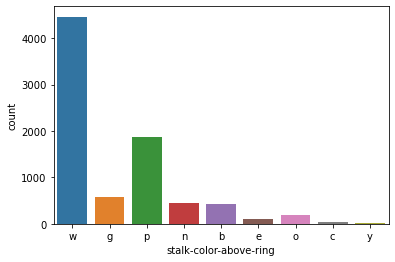

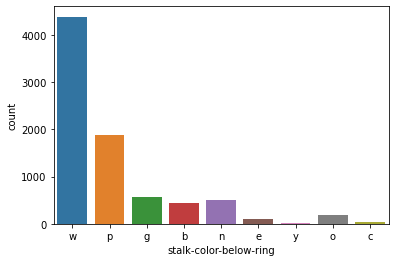

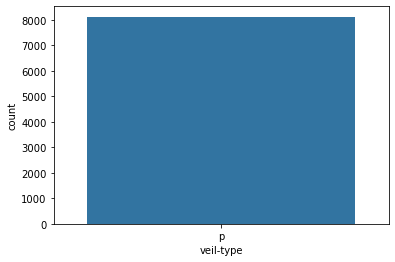

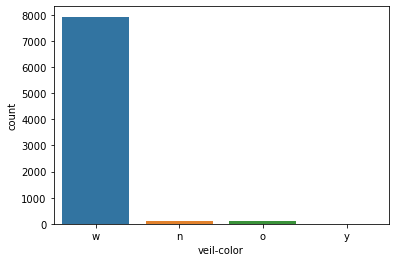

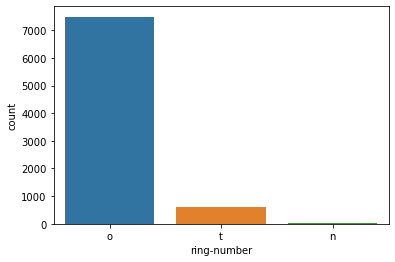

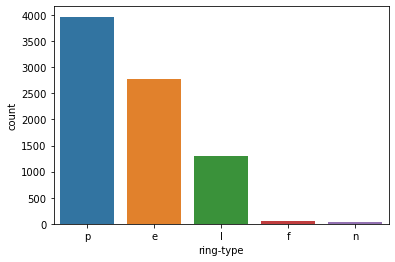

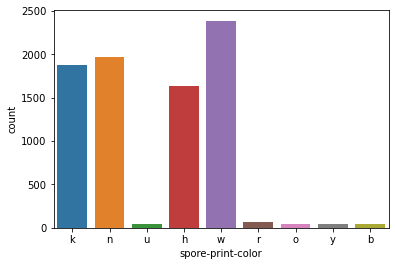

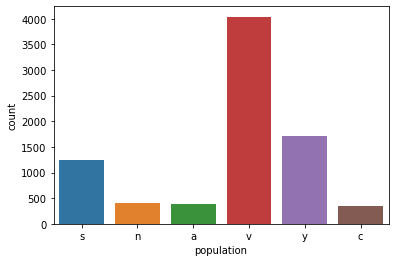

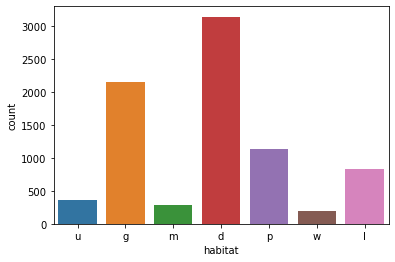

In [20]:
for i in Df.columns:
    sns.countplot(Df[i])
    plt.show()

In [32]:
#lets convert the object type values to integer
for i in Df.columns:
    Df[i] = Df[i].astype('category')
    Df[i] = Df[i].cat.codes

In [33]:
Df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [36]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int8 
 1   cap-shape                 8124 non-null   int8 
 2   cap-surface               8124 non-null   int8 
 3   cap-color                 8124 non-null   int8 
 4   bruises                   8124 non-null   int8 
 5   odor                      8124 non-null   int8 
 6   gill-attachment           8124 non-null   int8 
 7   gill-spacing              8124 non-null   int8 
 8   gill-size                 8124 non-null   int8 
 9   gill-color                8124 non-null   int8 
 10  stalk-shape               8124 non-null   int8 
 11  stalk-root                8124 non-null   int8 
 12  stalk-surface-above-ring  8124 non-null   int8 
 13  stalk-surface-below-ring  8124 non-null   int8 
 14  stalk-color-above-ring    8124 non-null 

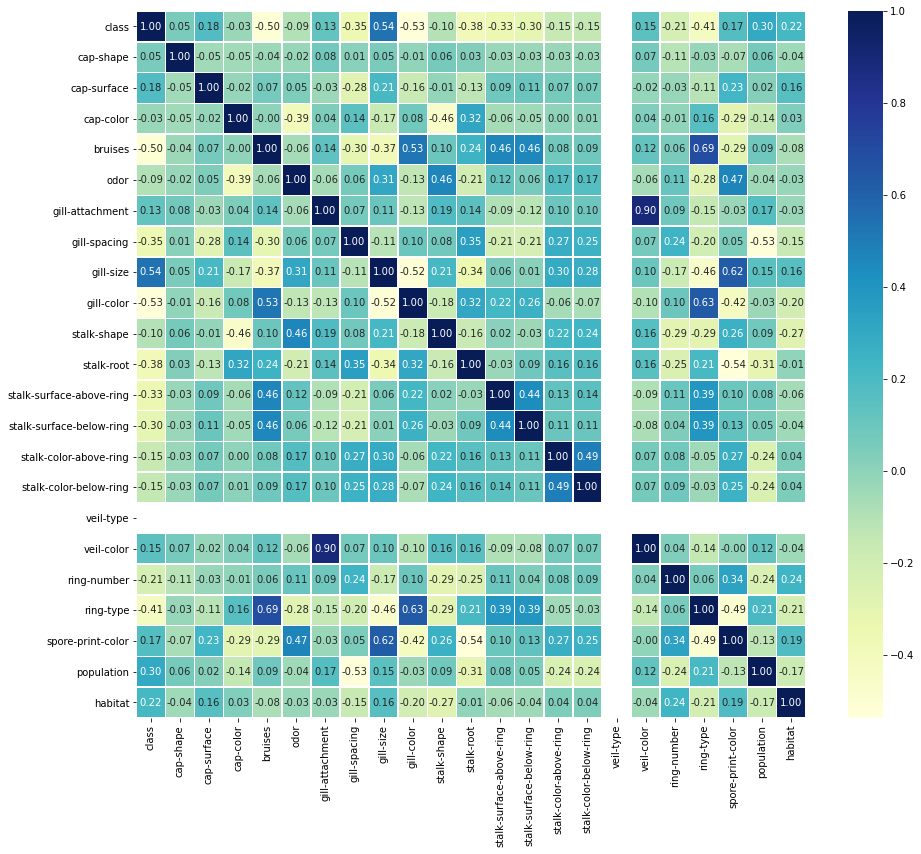

In [45]:
#lets see the correlayion between features
corr = Df.corr()
fig, ax = plt.subplots(figsize = (15,13))
sns.heatmap(corr,
           annot = True,
           cmap = 'YlGnBu',
           linewidths= .5,
           fmt ='.2f');

In [37]:
X = Df.drop('class', axis = 1)
y = Df['class']

In [38]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                    random_state = 42,
                                                   test_size = 0.2)

In [57]:
from sklearn.preprocessing import StandardScaler
sd = StandardScaler()
X_train1 = sd.fit_transform(X_train)
X_test1 = sd.fit_transform(X_test)

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
models = {'logisticregression': LogisticRegression(),
         'KNN': KNeighborsClassifier(),
         'RFC': RandomForestClassifier()}
model_score = {}
np.random.seed(42)
def fit_and_score(models, X_train, y_train, X_test, y_test):
    for names,model in models.items():
        model.fit(X_train, y_train)
        model_score[names] = model.score(X_test, y_test)
    return model_score

In [58]:
model_score = fit_and_score(models = models,
             X_train = X_train1,
             X_test= X_test1,
             y_train = y_train,
             y_test = y_test)
model_score

{'logisticregression': 0.9556923076923077, 'KNN': 1.0, 'RFC': 1.0}

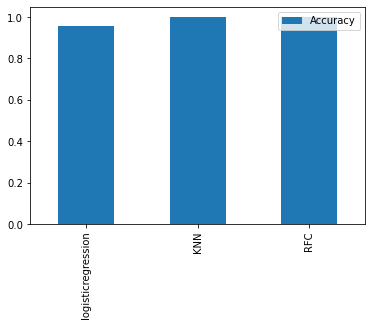

In [62]:
model_compare = pd.DataFrame(model_score, index = ['Accuracy'])
model_compare.T.plot.bar();

## Hyperparameter tuning using gridsearch cv

In [64]:
from sklearn.model_selection import GridSearchCV 
log_reg_grid = {'C':np.logspace(-4, 4, 30),
               'solver':['liblinear']}
log_grid = GridSearchCV(LogisticRegression(),
                       param_grid= log_reg_grid,
                       verbose = True,
                       cv = 5)
log_grid.fit(X_train1, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   12.8s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [65]:
log_grid.score(X_test1, y_test)

0.963076923076923

In [73]:
#lets evaluate the model
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

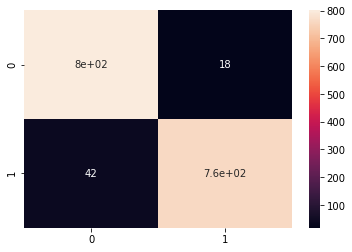

In [69]:
y_pred = log_grid.predict(X_test1)
conf = confusion_matrix(y_pred, y_test)
sns.heatmap(conf,
           annot = True);

In [70]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       819
           1       0.98      0.95      0.96       806

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625



In [74]:
import joblib
joblib.dump(log_grid , 'Logistic_regression.pkl')

['Logistic_regression.pkl']